In [1]:
from bert_sklearn import BertClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix




In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
X_train = list(train['processed tweet'])
y_train = list(train['Sentiment'])

X_test =list(test['processed tweet'])
y_test = list(test['Sentiment'])


In [4]:
model = BertClassifier()
model.fit(X_train, y_train)

Building sklearn text classifier...
Loading bert-base-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint
train data size: 1440, validation data size: 160


Training  :   0%|                                        | 0/45 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/python_arg_parser.cpp:1055.)
  next_m.mul_(beta1).add_(1 - beta1, grad)
Validating: 100%|███████████████████████████████| 20/20 [00:36<00:00,  1.81s/it]

Epoch 1, Train loss: 1.0832, Val loss: 1.0804, Val accy: 44.38%



Validating: 100%|███████████████████████████████| 20/20 [00:36<00:00,  1.81s/it]

Epoch 2, Train loss: 0.9560, Val loss: 0.9960, Val accy: 50.62%



Validating: 100%|███████████████████████████████| 20/20 [00:36<00:00,  1.80s/it]

Epoch 3, Train loss: 0.6978, Val loss: 1.0654, Val accy: 53.75%


BertClassifier(do_lower_case=True,
               label_list=array(['Negative', 'Neutral', 'Positive'], dtype='<U8'))

In [5]:
predictions = model.predict(X_test)

Predicting: 100%|███████████████████████████████| 50/50 [00:51<00:00,  1.02s/it]


In [6]:
f1 = f1_score(y_test, predictions, average='micro')*100
accuracy = accuracy_score(y_test, predictions)*100

In [7]:
print('Accuracy = %.2f'% accuracy)
print('F1 score = %.2f'% f1)

Accuracy = 58.25
F1 score = 58.25


In [8]:
model.validation_fraction

0.1

In [9]:
model.get_params()

{'bert_config_json': None,
 'bert_model': 'bert-base-uncased',
 'bert_vocab': None,
 'do_lower_case': True,
 'epochs': 3,
 'eval_batch_size': 8,
 'fp16': False,
 'from_tf': False,
 'gradient_accumulation_steps': 1,
 'ignore_label': None,
 'label_list': array(['Negative', 'Neutral', 'Positive'], dtype='<U8'),
 'learning_rate': 2e-05,
 'local_rank': -1,
 'logfile': 'bert_sklearn.log',
 'loss_scale': 0,
 'max_seq_length': 128,
 'num_mlp_hiddens': 500,
 'num_mlp_layers': 0,
 'random_state': 42,
 'restore_file': None,
 'train_batch_size': 32,
 'use_cuda': True,
 'validation_fraction': 0.1,
 'warmup_proportion': 0.1}

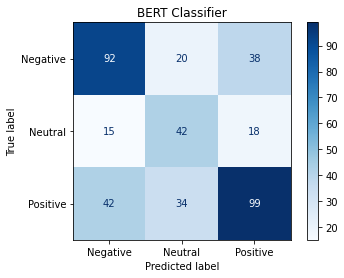

In [30]:
cm = confusion_matrix(predictions, y_test)
class_labels = ['Negative', 'Neutral', 'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('BERT Classifier')
plt.savefig("BERT_cm.png", dpi = 300)
plt.show()



In [26]:
from collections import  Counter
Counter(predictions)

Counter({'Negative': 150, 'Positive': 175, 'Neutral': 75})